# Final images

*27 Apr 2020*

This is the notebook for generating the final, corrected versions of the numerical power spectra.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from helpers import ADD, make_mask, sigma_cr

# 200 pixels
## Interlopers -- ext 0.8

In [3]:
raw_small = np.load('files/newkappa_int_ext0.8_theta0.7_pixnum200.npy')

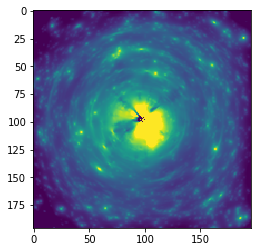

In [11]:
plt.imshow(raw_small, vmin=-.01, vmax=.01)

In [26]:
sharp_mask = make_mask(.1, .8, 200)
mask_coverage = np.sum(sharp_mask)/196**2

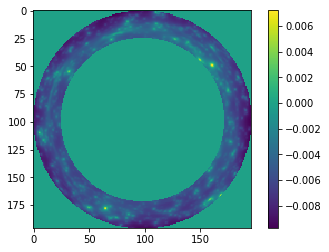

In [10]:
plt.imshow(raw_small * sharp_mask)
plt.colorbar()

In [12]:
np.save('files/raw_small_mask.npy', raw_small * sharp_mask)

In [14]:
ext = .8
zl = 0.5
phys_width_kpc = 2 * ext * np.pi/648000  * ADD(0, zl).to(u.kpc).value
print(phys_width_kpc)

10.072910564904317


In [24]:
zs = 1.0
sigma_cr(zl, zs).to(u.Msun/u.kpc**2)

<Quantity 3.00524458e+09 solMass / kpc2>

In [20]:
!~/python2 make_mask.py --pix_num=196 --side=10

In [26]:
!~/python2 power_spectrum.py \
--conv_file1 files/raw_small_mask.npy \
--kdir files/ \
--psdir files/ \
--pix_num 196 \
--side 10 \
--name raw_small \
--num_proj 1 \
--sigma_crit 3.01e9

convergence maps loaded:
files/raw_small_mask.npy
k saved in files/kraw_small_095_196_10.txt
saved files/ind_curves_raw_small_095_196_10.npy


In [16]:
kraw_small = np.loadtxt('files/kraw_small_095_196_10.txt')
praw_small = np.load('files/ind_curves_raw_small_095_196_10.npy')[0] / mask_coverage

## Interlopers -- ext 8

In [2]:
raw_big = np.load('files/newkappa_int_ext8.0_theta7.0_pixnum200.npy')

In [ ]:
plt.imshow(raw_big, vmin=-.01, vmax=.01)

In [ ]:
plt.imshow(raw_big * sharp_mask)
plt.colorbar()

In [9]:
np.save('files/raw_big_mask.npy', raw_big * sharp_mask)

In [30]:
ext = 8.0
zl = 0.5
phys_width_kpc = 2 * ext * np.pi/648000  * ADD(0, zl).to(u.kpc).value
print(phys_width_kpc)

100.72910564904318


In [11]:
!~/python2 make_mask.py --pix_num=196 --side=101

In [12]:
!~/python2 power_spectrum.py \
--conv_file1 files/raw_big_mask.npy \
--kdir files/ \
--psdir files/ \
--pix_num 196 \
--side 101 \
--name raw_big \
--num_proj 1 \
--sigma_crit 3.01e9

convergence maps loaded:
files/raw_big_mask.npy
k saved in files/kraw_big_095_196_101.txt
saved files/ind_curves_raw_big_095_196_101.npy


In [13]:
kraw_big = np.loadtxt('files/kraw_big_095_196_101.txt')
praw_big = np.load('files/ind_curves_raw_big_095_196_101.npy')[0] / mask_coverage

## Graphs

In [14]:
## Load analytic curve for comparison
badtheory = np.loadtxt('files/analytic_curves/arthurcagan2.txt')

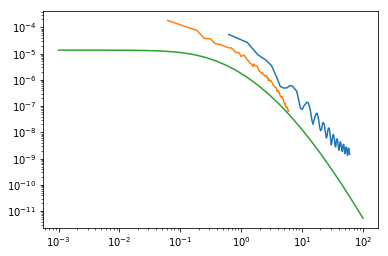

In [17]:
plt.loglog(kraw_small, praw_small)
plt.loglog(kraw_big, praw_big)
plt.loglog(badtheory[:,0], badtheory[:,1])

In [18]:
# load some old curves for comparison
k_500old = np.loadtxt('files/kp500_095_496_10.txt')
p_500old = np.load('files/ind_curves_p500_095_496_10.npy')[0] / mask_coverage # same mask
ke8_500old = np.loadtxt('files/kp500e8_095_496_97.txt')
pe8_500old = np.load('files/ind_curves_p500e8_095_496_97.npy')[0] / mask_coverage

ks_200old = np.loadtxt('files/ks{}_095_196_10.txt'.format(100))
ps_200old = np.load('files/ind_curves_s{}_095_196_10.npy'.format(100))[0] / mask_coverage
kse8_200old = np.loadtxt('files/ks{}e8_095_196_97.txt'.format(100))
pse8_200old = np.load('files/ind_curves_s{}e8_095_196_97.npy'.format(100))[0] / mask_coverage

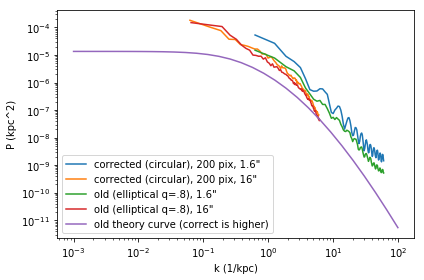

In [20]:
plt.loglog(kraw_small, praw_small, label='corrected (circular), 200 pix, 1.6"')
plt.loglog(kraw_big, praw_big, label='corrected (circular), 200 pix, 16"')
#plt.loglog(k_500old, p_500old, label='old (elliptical q=.8), 1.6"')
#plt.loglog(ke8_500old, pe8_500old, label='old (elliptical q=.8), 16"')
plt.loglog(ks_200old, ps_200old, label='old (elliptical q=.8), 1.6"')
plt.loglog(kse8_200old, pse8_200old, label='old (elliptical q=.8), 16"')
plt.loglog(badtheory[:,0], badtheory[:,1], label='old theory curve (correct is higher)')
plt.legend()
plt.xlabel('k (1/kpc)')
plt.ylabel('P (kpc^2)')
plt.tight_layout()

# 500 pixels

In [3]:
job_outs = ['cannon_out/myoutput_54524676.out', 'cannon_out/myoutput_54737405.out', 'cannon_out/myoutput_54766264.out']
linums = []
datalines = [None] * 500
for job_out in job_outs:
    with open(job_out, 'r') as f:
        for line in f:
            lin = line.split()
            if len(lin) > 4 and lin[0] == 'finished' and lin[1] == 'row':
                linum = int(lin[2])
                datalines[linum] = eval(' '.join(lin[3:]))
                linums.append(linum)
datalines = np.array(datalines)

## Mask illustration

In [22]:
newkappa = np.load('files/newkappa_int_ext8.0_theta7.0_pixnum500.npy')

In [ ]:
plt.imshow(newkappa, vmin=-1e-2, vmax=1e-2)

In [27]:
sharp_mask = make_mask(.1, .8, 500)
mask_coverage = np.sum(sharp_mask)/496**2

In [31]:
ext = 8.0
zl = 0.5
phys_width_kpc = 2 * ext * np.pi/648000  * ADD(0, zl).to(u.kpc).value
print(phys_width_kpc)

100.72910564904318


In [ ]:
masked_kappa = newkappa * sharp_mask
for i in range(496):
    for j in range(496):
        if sharp_mask[i,j] == 0:
            masked_kappa[i,j] = float('nan')
plt.imshow(masked_kappa, extent=[-phys_width_kpc/2, phys_width_kpc/2, -phys_width_kpc/2, phys_width_kpc/2], aspect='equal')
cbar = plt.colorbar()
cbar.set_label('Convergence', fontsize=16)
cbar.ax.tick_params(labelsize=12)
plt.xlabel('x (kpc)', fontsize=16)
plt.ylabel('y (kpc)', fontsize=16)
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
#plt.savefig('imgs/may5_mask.png')